In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import warnings
warnings.simplefilter("ignore")
import time
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import colorlover as cl

import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [2]:
train_data = pd.read_csv('main_task.csv')
train_data.shape

(40000, 10)

In [3]:
test_data = pd.read_csv('kaggle_task.csv')
test_data.shape

(10000, 10)

In [4]:
test_data['Rating'] = 0
data = train_data.append(test_data, sort=False).reset_index(drop=True)
data.shape

(50000, 11)

<b> Investigating ranking of the restaurants in the cities

In [5]:
import plotly.io as pio
pio.renderers.default = "svg"

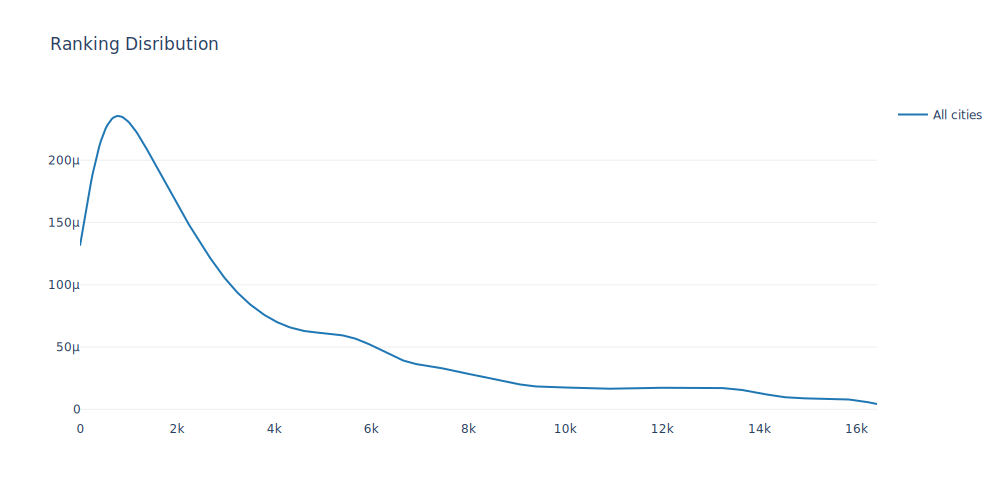

In [6]:
import plotly.figure_factory as ff
group_labels = ['All cities']

fig = ff.create_distplot([data['Ranking'].to_list()], group_labels, show_hist=False, show_rug=False)
fig.update_layout(title_text='Ranking Disribution',
                  width=700,
                  height=400,
                  plot_bgcolor='rgba(0,0,0,0)',
                  yaxis=dict(gridcolor='#EEEEEE', nticks=10, zeroline=False)
                 )
pio.show(fig, width=1000, height=500)

In [7]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=4, cols=4, vertical_spacing = 0.06,
                    subplot_titles=(train_data['City'].value_counts()[0:16].index))
for i,j in enumerate(train_data['City'].value_counts()[0:16].index):
    col=i%4+1
    row=i//4+1
    fig.add_trace(go.Scatter(x=train_data[train_data['City']==j]['Ranking'],
                             y=train_data[train_data['City']==j]['Number of Reviews'],
                             mode='markers',
                             marker=dict(color='rgba(0,0,0,0)',
                                         line_width=0.9,
                                         line_color = train_data[train_data['City']==j]['Rating'],
                                         line_colorscale='rainbow',
                                         maxdisplayed=4000
                                        ),
                             text=train_data[train_data['City']==j]['Rating']),
                  row=row,
                  col=col
                 ) 
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.update_layout(title='Rating outliers',
                  width=1000,
                  height=1000,
                  plot_bgcolor='rgba(0,0,0,0)',
                  showlegend=False
                 )
fig.update_xaxes(title_text="Ranking", row=4, col=2)
fig.update_yaxes(title_text="Number of Reviews", row=2, col=1)
pio.show(fig, width=1000, height=900)
